# imprtant needed libraries

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.pipeline import make_pipeline
from category_encoders import OneHotEncoder
from sklearn.linear_model import Ridge , LinearRegression
from sklearn.metrics import mean_absolute_error
from ipywidgets import Dropdown, interact

# Wrangle Function
## read and preprocess the data

In [152]:
def wrangle(path):
    #read the data path
    df = pd.read_csv(path,encoding="latin")

    #recasting features 
    df["Duration"]=df["Duration"].str.replace(" min","").astype(float)
    
    df["Year"]=df["Year"].str.strip("()").astype(float)
    
    df["Votes"]=df["Votes"].str.replace(",","")
    df["Votes"]=df["Votes"].str.replace("$5.16M","516",regex=False).astype(float)
    
    # split genre to one type in row
    df["Genre"]=df["Genre"].str.split(",").explode("Genre").reset_index(drop=True)
    
    # show data
    print("frist 10 data rows: ")
    print(df.head(10))
    print()
    

    
    #show data description
    print("statistical description of data: ")
    print(df.describe())
    print()
    
    #drop least number of nulls in all features has 
    df.dropna(subset=["Genre","Actor 1","Year","Director","Actor 2","Actor 3"],inplace=True)
    #fill target nulls 
    df["Rating"].fillna(df["Rating"].mean(),inplace=True)
    #check is nulls in data 
    print("propotion of data nulls of each column: ")
    print(df.isnull().sum()/len(df))
    print()
    
        
    #show data info
    print("info about data: ")
    print(df.info())
    print()
    
    #check douplicates in data
    print("number of rows douplicated in data: ")
    print(df.duplicated().sum())
    # drop the douplicated rows
    df.drop_duplicates(inplace=True)
    #ensure that there is no douplicated rows
    print("check there are no rows douplicated: ")
    print(df.duplicated().sum())
    
    return df

In [153]:
movie_data = wrangle(r"IMDb Movies India.csv")

frist 10 data rows: 
                                 Name    Year  Duration     Genre  Rating  \
0                                         NaN       NaN     Drama     NaN   
1  #Gadhvi (He thought he was Gandhi)  2019.0     109.0     Drama     7.0   
2                         #Homecoming  2021.0      90.0     Drama     NaN   
3                             #Yaaram  2019.0     110.0   Musical     4.4   
4                   ...And Once Again  2010.0     105.0    Comedy     NaN   
5                ...Aur Pyaar Ho Gaya  1997.0     147.0   Romance     4.7   
6                           ...Yahaan  2005.0     142.0     Drama     7.4   
7                      .in for Motion  2008.0      59.0    Comedy     NaN   
8                  ?: A Question Mark  2012.0      82.0     Drama     5.6   
9                            @Andheri  2014.0     116.0   Musical     4.0   

    Votes            Director          Actor 1                 Actor 2  \
0     NaN       J.S. Randhawa         Manmauji           

# let's see the top movies rating according to ['Name','Genre','Director','Actor 1','Actor 2','Actor 3']

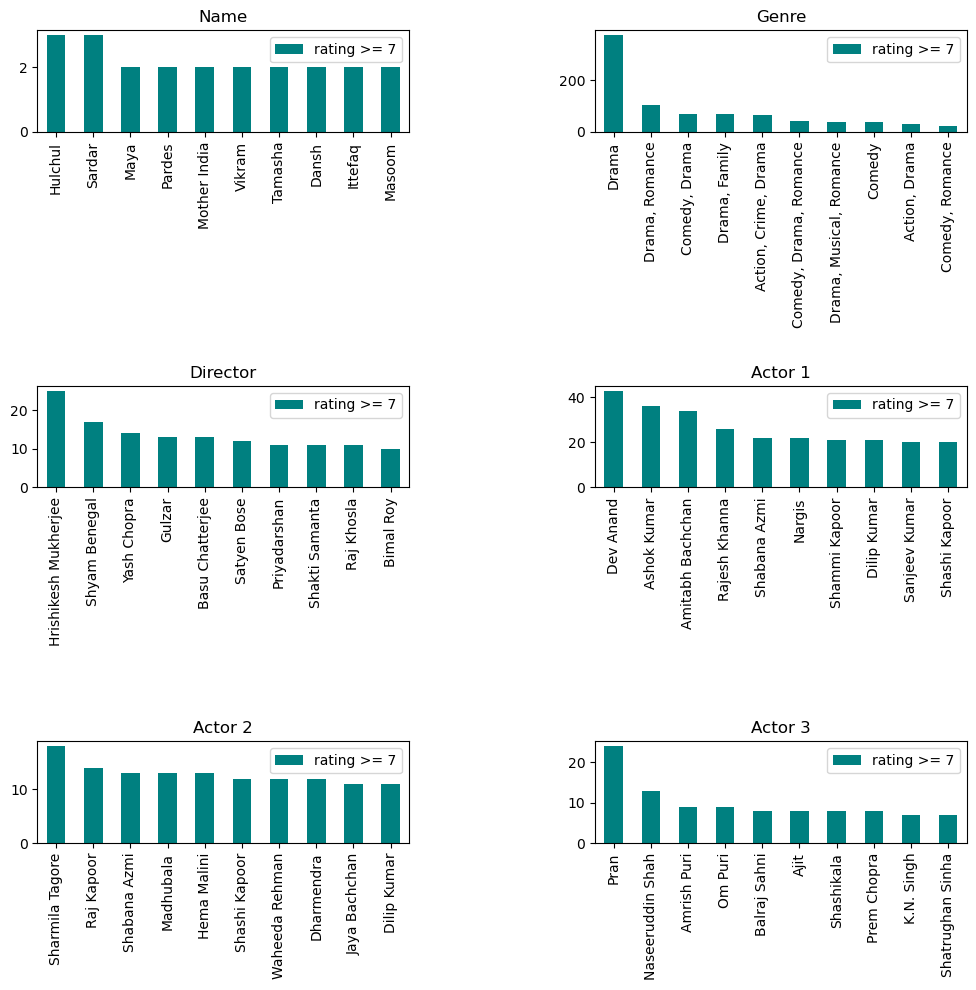

In [111]:
movie_data.sort_values(by="Rating",ascending=False,inplace=True)
#categorical_features and deposit
features_to_visualize = ['Name','Genre','Director','Actor 1','Actor 2','Actor 3']

fig, axs = plt.subplots(3,2, figsize=(10, 10))

# Flatten the axs array to easily iterate through it
axs = axs.flatten()

for i , column in enumerate(features_to_visualize):
    df = pd.DataFrame()
    df['rating >= 7'] = movie_data[movie_data['Rating'] >= 7 ][column].value_counts().head(10)
    df.plot.bar(title = f'{column}' , ax=axs[i] , color='teal' )

# Adjust layout to prevent overlap and add space between subplots
plt.tight_layout()
plt.subplots_adjust(wspace=0.5, hspace=2.5)  # Adjust these values as needed for more/less space
    


# show distribution of numerical features

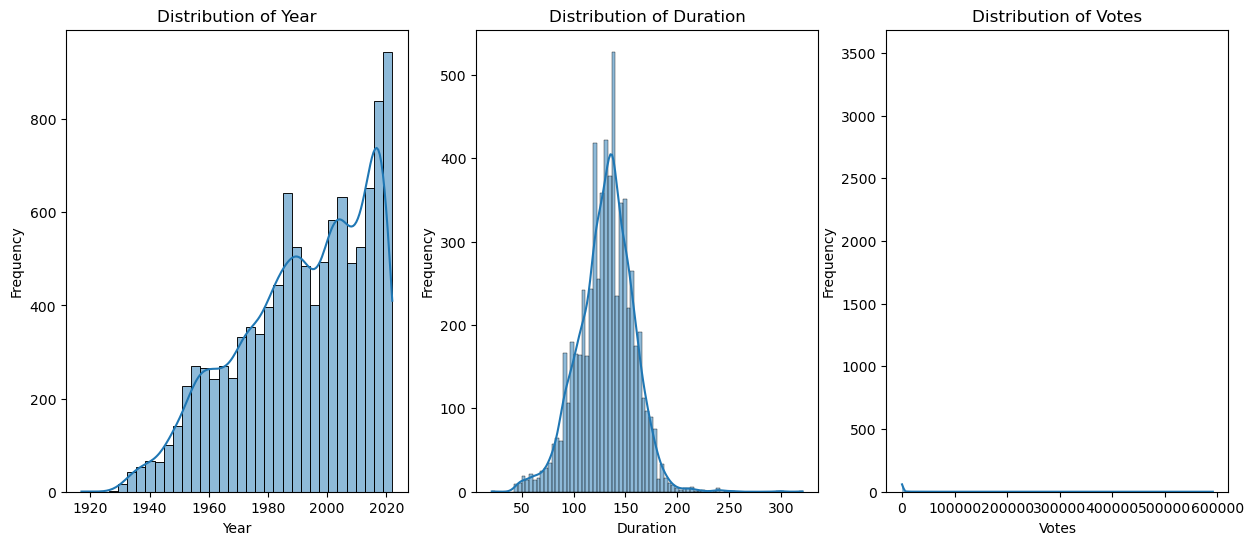

In [112]:
features = ['Year', 'Duration','Votes']
fig, axs = plt.subplots(1, 3, figsize=(15, 6))
for i,feature in enumerate(features):
    sns.histplot( data = movie_data , x=feature , kde=True , ax = axs[i]  )
    axs[i].set_title(f'Distribution of {feature}')
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Frequency')
    
plt.show()

# Spliting the data 

In [130]:
X_train , X_test , y_train  , y_test = train_test_split(
    movie_data[['Genre','Director','Actor 1','Actor 2','Actor 3']],  movie_data["Rating"]
    , test_size=0.20, random_state=42)

# build the model 

In [139]:
model = make_pipeline(
    OneHotEncoder(),
    LinearRegression()
)
model.fit(X_train,y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Genre', 'Director', 'Actor 1', 'Actor 2',
                                     'Actor 3'])),
                ('linearregression', LinearRegression())])

# Evolate the model

In [140]:
y_pred_training = model.predict(X_test)
print("Training MAE:", mean_absolute_error(y_test , y_pred_training))

Training MAE: 0.19367940194868924


In [160]:
def make_prediction(Genre, Director, Actor_1 , Actor_2 , Actor_3):
    data = {
        "Genre" : Genre,
        "Director" : Director,
        "Actor 1" : Actor_1,
        "Actor 2" : Actor_2,
        "Actor 3" : Actor_3 
    }
    df = pd.DataFrame(data , index=[0])
    prediction = model.predict(df)
    return f"Predicted of rating to your movie is : {prediction}"

In [161]:
  make_prediction("Drama","Gulzar" , "Dev Anand","Sharmila Tagore" , "Pran")

'Predicted of rating to your movie is : [8.05262375]'

# make interaction to easy data entery and quick predection

In [163]:
interact(
    make_prediction,
    Genre=Dropdown(options=sorted(X_train["Genre"].unique())),
    Director=Dropdown(options=sorted(X_train["Director"].unique())),
    Actor_1=Dropdown(options=sorted(X_train["Actor 1"].unique())),
    Actor_2=Dropdown(options=sorted(X_train["Actor 2"].unique())),
    Actor_3=Dropdown(options=sorted(X_train["Actor 3"].unique())),
);

interactive(children=(Dropdown(description='Genre', options=('Action', 'Action, Adventure', 'Action, Adventure…